<a href="https://colab.research.google.com/github/A01706648/TC3006_ClassWork/blob/main/m1/Workshop2_Chanllenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install yfinance
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 5.0 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [4]:
import yfinance as yf
import numpy as np
import pandas as pd
import pandas_datareader as pdr

In [6]:
#define the ticker symbol
tickerSymbol = 'MSFT'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get the historical prices for this ticker
MSFT_History = tickerData.history(period='1d', start='2010-1-1', end='2022-8-12')

#see your data
MSFT_History

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-01-04,23.546460,23.915574,23.523390,23.800226,38409100,0.0,0
2010-01-05,23.723323,23.915570,23.561835,23.807911,49749600,0.0,0
2010-01-06,23.746398,23.900196,23.469563,23.661810,58182400,0.0,0
2010-01-07,23.554146,23.607977,23.215792,23.415730,50559700,0.0,0
2010-01-08,23.285000,23.746392,23.254240,23.577215,51197400,0.0,0
...,...,...,...,...,...,...,...
2022-08-05,279.149994,283.649994,278.679993,282.910004,16767900,0.0,0
2022-08-08,284.049988,285.920013,279.320007,280.320007,18739200,0.0,0
2022-08-09,279.640015,283.079987,277.609985,282.299988,23405200,0.0,0


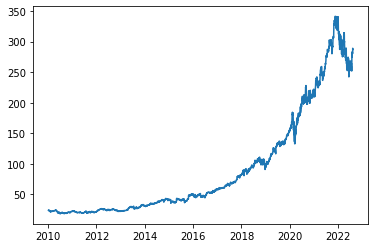

In [7]:
import matplotlib
from matplotlib.pyplot import*

plot(MSFT_History["Close"])
show()

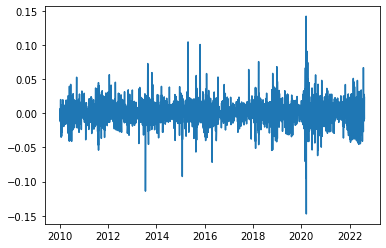

In [9]:
MSFT_History["Return"] = (MSFT_History["Close"] / MSFT_History["Close"].shift(1)) - 1
plot(MSFT_History["Return"])
show()

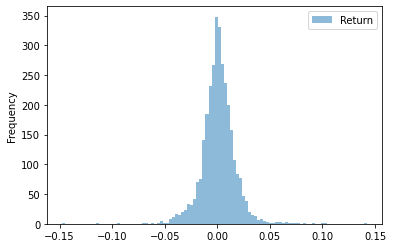

In [18]:
MSFT_df = pd.DataFrame(MSFT_History["Return"])
hist = MSFT_df.plot.hist(bins=100, alpha = 0.5)

In [20]:
MSFT_Mean_Daily = MSFT_df["Return"].mean()
MSFT_Mean_Daily

0.0009151041185734742

In [22]:
MSFT_df_Daily_Std = MSFT_df["Return"].std()
MSFT_df_Daily_Std

0.016130653610635814

In [23]:
MSFT_df.count()

Return    3173
dtype: int64

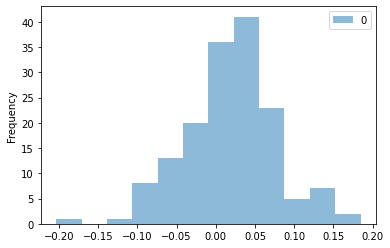

In [27]:
MSFT_Monthly_Return = list()
for count_month in range(MSFT_df["Return"].count() // 20):
  return_month = 0.0
  for count_day in range(20):
    return_month += MSFT_df["Return"][count_month * 20 + count_day]
  MSFT_Monthly_Return.append(return_month)

MSFT_df_Month = pd.DataFrame(MSFT_Monthly_Return)
hist = MSFT_df_Month.plot.hist(bins=12, alpha = 0.5)

In [28]:
MSFT_Monthly_Mean = MSFT_df_Month.mean()
MSFT_Monthly_Mean

0    0.018379
dtype: float64

In [29]:
MSFT_Monthly_Std = MSFT_df_Month.std()
MSFT_Monthly_Std

0    0.059216
dtype: float64

Since the monthly return mean is 0.018
and the monthly return standard diviation is 0.059
So there will be 95% change of the month return is between
-0.41 to 0.077

So there is no garrantee of positive return from Microsoft Stock